# 

# 데이터 전처리
## 넘파이로 데이터 준비하기

In [5]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]  # 생선 길이 데이터
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]  # 생선 무게 데이터

In [6]:
import numpy as np  # numpy 불러오기

In [7]:
np.column_stack(([1, 2, 3], [4, 5, 6]))  # 두 배열을 열 방향으로 합치기

array([[1, 4],
       [2, 5],
       [3, 6]])

In [8]:
fish_data = np.column_stack((fish_length, fish_weight))  # (길이, 무게) 쌍으로 데이터 생성
print(fish_data[:5])  # 앞 5개 행 출력

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [9]:
print(np.ones((5)))  # 1로 채워진 1차원 배열(5개) 생성 및 출력

[1. 1. 1. 1. 1.]


In [10]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))  # 도미: 1, 빙어: 0으로 타깃 생성
print(fish_target)  # 타깃 배열 출력

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [11]:
from sklearn.model_selection import train_test_split  # 데이터 분할 함수 불러오기

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42  # 입력, 타깃 데이터 분할 (랜덤 시드 고정)
)

In [12]:
print(train_input.shape, test_input.shape)  # 훈련/테스트 입력 데이터 shape 출력

(36, 2) (13, 2)


In [13]:
print(train_target.shape, test_target.shape)  # 훈련/테스트 타깃 데이터 shape 출력

(36,) (13,)


In [14]:
print(test_target)  # 테스트 타깃 배열 출력

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42  # 타깃 비율 유지하며 분할
    )

In [16]:
print(test_target)  # 테스트 타깃 배열 출력

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## 수상한 도미 한 마리

In [17]:
from sklearn.neighbors import KNeighborsClassifier  # k-최근접 이웃 분류기 불러오기

kn = KNeighborsClassifier()  # 분류기 객체 생성
kn.fit(train_input, train_target)  # 훈련 데이터로 모델 학습
kn.score(test_input, test_target)  # 테스트 데이터 정확도

1.0

In [18]:
print(kn.predict([[25, 150]]))  # 길이 25, 무게 150인 샘플 예측

[0.]


In [19]:
import matplotlib.pyplot as plt  # 시각화 라이브러리 불러오기

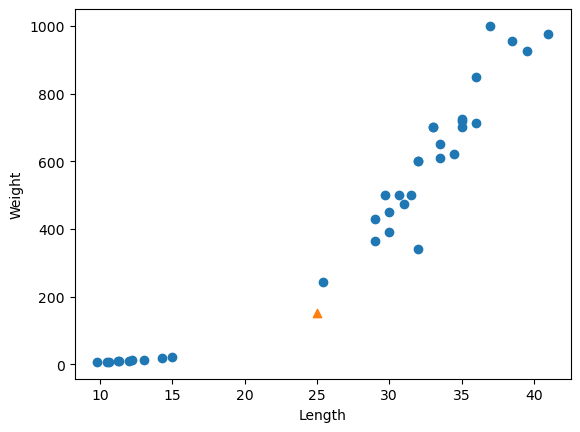

In [20]:
plt.scatter(train_input[:, 0], train_input[:, 1])  # 훈련 데이터 산점도
plt.scatter(25, 150, marker='^')  # 새로운 샘플(25, 150) 표시
plt.xlabel('Length')  # x축 레이블
plt.ylabel('Weight')  # y축 레이블
plt.show()  # 그래프 출력

In [21]:
distances, indexes = kn.kneighbors([[25, 150]])  # (25, 150)과 가까운 이웃 찾기

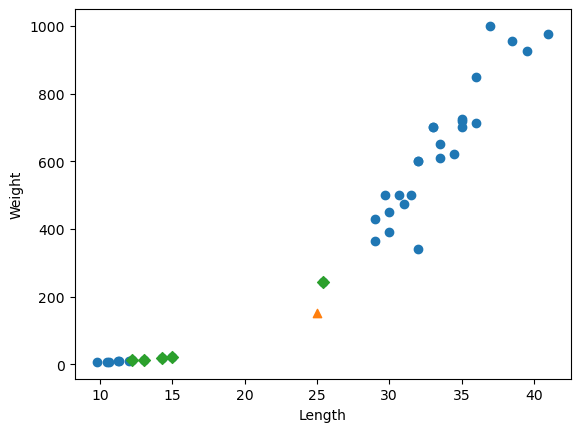

In [22]:
plt.scatter(train_input[:, 0], train_input[:, 1])  # 훈련 데이터 산점도
plt.scatter(25, 150, marker='^')  # 새로운 샘플 표시
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')  # 이웃 데이터 표시
plt.xlabel('Length')  # x축 레이블
plt.ylabel('Weight')  # y축 레이블
plt.show()  # 그래프 출력

In [23]:
print(train_input[indexes])  # 이웃 데이터 출력

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [24]:
print(train_target[indexes])  # 이웃의 타깃 값 출력

[[1. 0. 0. 0. 0.]]


In [25]:
print(distances)  # 이웃까지의 거리 출력

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


## 기준을 맞춰라

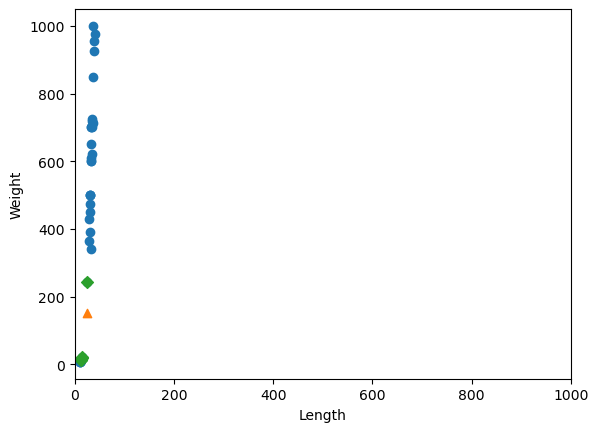

In [26]:
plt.scatter(train_input[:, 0], train_input[:, 1])  # 훈련 데이터 산점도
plt.scatter(25, 150, marker='^')  # 새로운 샘플 표시
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')  # 이웃 데이터 표시
plt.xlim(0, 1000)  # x축 범위 지정
plt.xlabel('Length')  # x축 레이블
plt.ylabel('Weight')  # y축 레이블
plt.show()  # 그래프 출력

In [27]:
mean = np.mean(train_input, axis=0)  # 훈련 데이터 평균 계산
std = np.std(train_input, axis=0)  # 훈련 데이터 표준편차 계산

In [28]:
print(mean, std)  # 평균, 표준편차 출력

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [29]:
train_scaled = (train_input - mean) / std  # 훈련 데이터 표준화

##  전처리 데이터로 모델 훈련하기

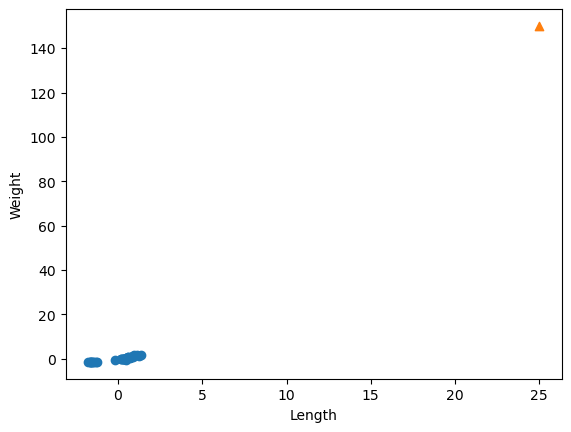

In [30]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])  # 표준화된 훈련 데이터 산점도
plt.scatter(25, 150, marker='^')  # 새로운 샘플 표시
plt.xlabel('Length')  # x축 레이블
plt.ylabel('Weight')  # y축 레이블
plt.show()  # 그래프 출력

In [31]:
new = ([25, 150] - mean) / std  # 새로운 샘플 표준화

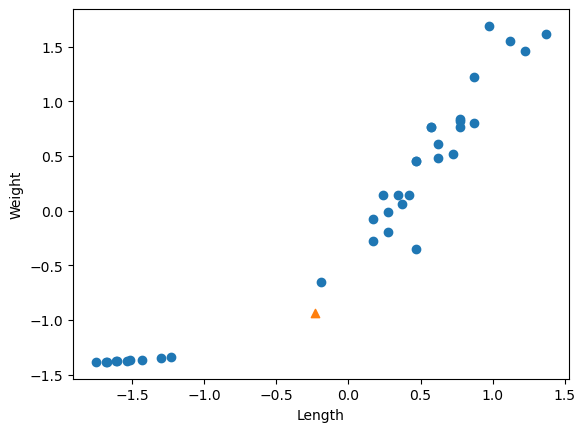

In [32]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])  # 표준화된 훈련 데이터 산점도
plt.scatter(new[0], new[1], marker='^')  # 표준화된 새로운 샘플 표시
plt.xlabel('Length')  # x축 레이블
plt.ylabel('Weight')  # y축 레이블
plt.show()  # 그래프 출력

In [33]:
kn.fit(train_scaled, train_target)  # 표준화된 데이터로 모델 재학습

KNeighborsClassifier()

In [34]:
test_scaled = (test_input - mean) / std  # 테스트 데이터 표준화

In [35]:
kn.score(test_scaled, test_target)  # 표준화된 테스트 데이터 정확도

1.0

In [36]:
print(kn.predict([new]))    # 표준화된 새로운 샘플 예측

[1.]


In [37]:
distances, indexes = kn.kneighbors([new])  # 표준화된 새로운 샘플의 이웃 찾기

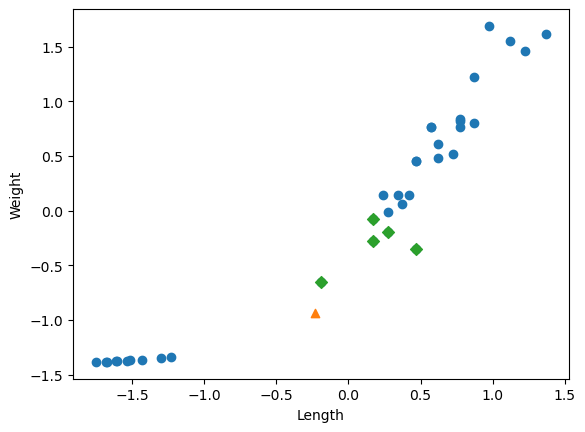

In [38]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])  # 표준화된 훈련 데이터 산점도
plt.scatter(new[0], new[1], marker='^')  # 표준화된 새로운 샘플 표시
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')  # 이웃 데이터 표시
plt.xlabel('Length')  # x축 레이블
plt.ylabel('Weight')  # y축 레이블
plt.show()  # 그래프 출력